<a href="https://colab.research.google.com/github/glyngdoh/machine_learning_examples/blob/master/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description: This program classifies images

In [2]:
# import the libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import  Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
# look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# get the shape of the arrays
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


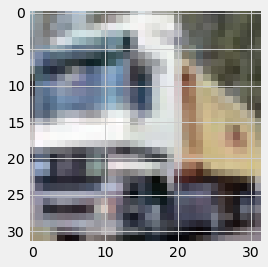

In [12]:
# take a look at th efirst image as an array
index = 1
# shown the image as a picture
img = plt.imshow(x_train[index])

In [13]:
# get the image label
print('The image label is:', y_train[index])

The image label is: [9]


In [14]:
# get the image classification
classification = ["airplane", 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# print the image class
print('The image class is: ', classification[y_train[index][0]])

The image class is:  truck


In [28]:
# convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [29]:
# print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [30]:
# print the new label of the current image above
print('The one hot label is ', y_train_one_hot[index])

The one hot label is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [31]:
# normalize the pixels to be values between 0 and 1
x_train = x_train/255
x_test = x_test/255

In [33]:
# create the model architecture
model = Sequential()

# add the first layer 
model.add(Conv2D(32, (5,5), activation='relu', input_shape = (32,32,3)))

# add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# add another convolution layer
model.add(Conv2D(32, (5,5), activation='relu'))

# add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# add a flattening layer
model.add(Flatten())

# add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

# add a dropout layer
model.add(Dropout(0.5))

# add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

# add a dropout layer
model.add(Dropout(0.5))

# add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

# add a layer with 250 neurons
model.add(Dense(10, activation='softmax'))

In [38]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [39]:
# train the model
hist = model.fit(x_train,y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 52s 334ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 2/10
157/157 [==============================] - 52s 332ms/step - loss: 2.3027 - accuracy: 0.1011 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 3/10
157/157 [==============================] - 52s 331ms/step - loss: 2.3026 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 4/10
157/157 [==============================] - 52s 331ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 5/10
157/157 [==============================] - 52s 332ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 6/10
157/157 [==============================] - 52s 331ms/step - loss: 2.3027 - accuracy: 0.1007 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 7/10
157/157 [==============================] - 54s 344ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3027 - val_ac

In [1]:
# evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

NameError: ignored

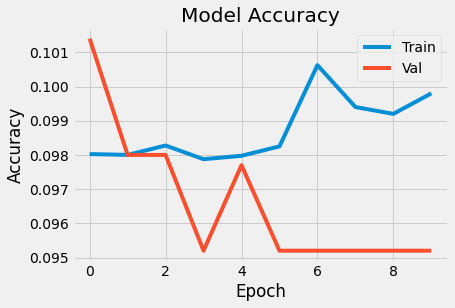

In [37]:
# visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()